In [1]:
# param
BASE_FOLDER = '/home/jim/Documents/'
TAR_FILE_NAME = 'clean_data_0627.tar'
FOLDER_PATH = BASE_FOLDER + 'data'
IMG_FOLDER_PATH = FOLDER_PATH + '/img'
MODEL_FOLDER_PATH = BASE_FOLDER + 'model/'
MODEL_NAME = 'steering_ep_99.pth'

In [2]:
import torch
import torchvision
import torch.nn as nn

class NvidiaModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=24, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, 2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, 2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3),
            nn.ELU(),
            nn.Conv2d(64, 64, 3),
            nn.ELU(),
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=64*18, out_features=100),
            nn.ELU(),
            nn.Linear(100, 50),
            nn.ELU(),
            nn.Linear(50, 10),
            nn.ELU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size()[0], -1)
        # x = x.view(-1, 64*18)
        x = self.classifier(x)
        return x

In [3]:
from torchvision import transforms
from PIL import Image

tf_compose = transforms.Compose([
    transforms.Resize((200, 66)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [4]:
device = torch.device('cuda')
model = NvidiaModel()
model.load_state_dict(torch.load(MODEL_FOLDER_PATH + MODEL_NAME))
model = model.to(device)
model = model.eval().half()

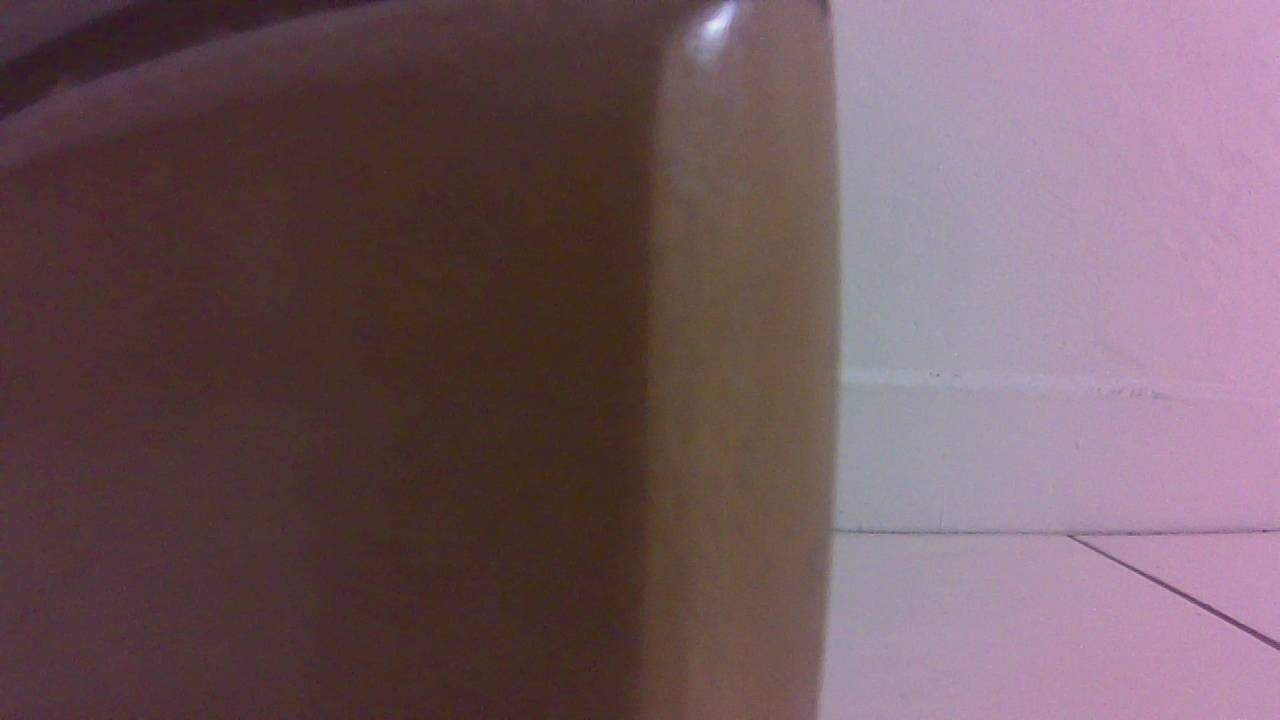

5.55419921875


In [ ]:
import numpy as np
import os
from IPython.display import clear_output, Image as NImage, display
from time import sleep
%matplotlib inline

for fn in os.listdir(IMG_FOLDER_PATH):
    file_path = IMG_FOLDER_PATH + '/' + fn
    pil_img = Image.open(file_path)
    img = tf_compose(pil_img).unsqueeze(0).to(device).half()
    output = model(img).detach().float().cpu().numpy().flatten()

    display(NImage(filename=file_path))
    print(output[0]*100)

    sleep(1)
    clear_output(wait=True)